In [ ]:
# Install TensorFlow if running on a fresh Colab
# !pip install tensorflow

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Function to load images and assign a label
def load_images_from_folder(folder, label):
    images, labels = [], []
    if not os.path.exists(folder):
        print(f"Error: Folder not found at {folder}")
        return images, labels
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(label)
    print(f"Loaded {len(images)} images from {folder}") # Add print to show how many images were loaded
    return images, labels

# Load Brain Tumor images (label 0)
brain_images, brain_labels = load_images_from_folder('/content/drive/MyDrive/brain _tumor/Testing', label=0)

# Load Chest X-ray images (label 1)
chest_images, chest_labels = load_images_from_folder('/content/drive/MyDrive/chest_xray/chest_xray/test', label=1)

# Combine datasets
images = brain_images + chest_images
labels = brain_labels + chest_labels

print(f"Total images loaded: {len(images)}") # Print total images loaded

# Convert to NumPy arrays and normalize
# Only proceed if images were loaded
if len(images) > 0:
  X = np.array(images).reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 1) / 255.0 # Use IMAGE_SIZE tuple elements
  y = np.array(labels)

  #split into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  # Build CNN model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1))) # Use IMAGE_SIZE tuple elements
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

  # Evaluate on test set
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_accuracy:.4f}")

  # Plot training & validation accuracy
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  # Plot training & validation loss
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

else:
  print("Error: No images were loaded from either folder. Please check the folder paths and contents.")

Loaded 0 images from /content/drive/MyDrive/brain _tumor/Testing
Loaded 0 images from /content/drive/MyDrive/chest_xray/chest_xray/test
Total images loaded: 0
Error: No images were loaded from either folder. Please check the folder paths and contents.


Loaded 415 images from /content/drive/MyDrive/brain _tumor/Testing/notumor
Loaded 394 images from /content/drive/MyDrive/chest_xray/train/NORMAL
Total images loaded: 809


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7704 - loss: 0.5036 - val_accuracy: 1.0000 - val_loss: 0.0799
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9813 - loss: 0.0974 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9990 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0030
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.9962 - loss: 0.0150
Test accuracy: 0.9938


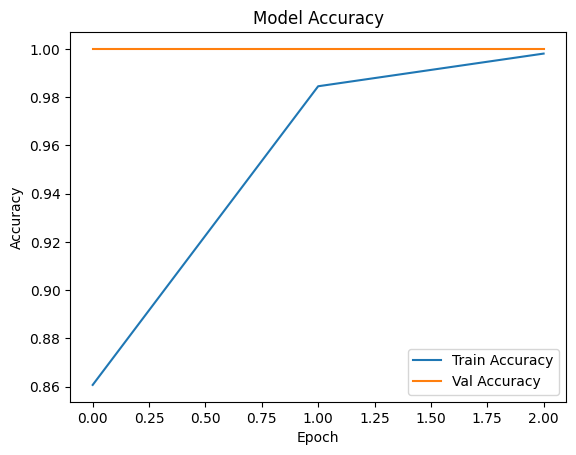

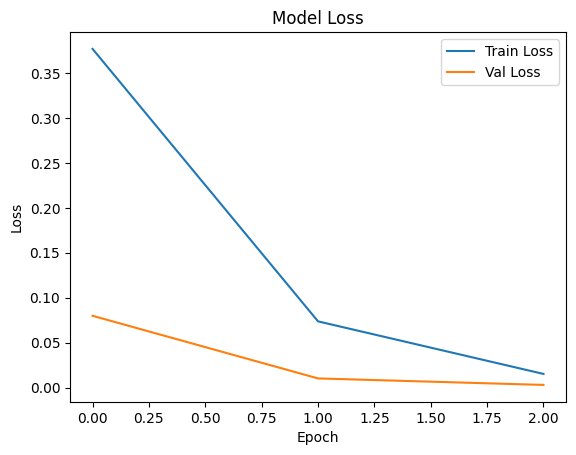

In [ ]:
# Install TensorFlow if running on a fresh Colab
# !pip install tensorflow

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 3

# Function to load images and assign a label
def load_images_from_folder(folder, label):
    images, labels = [], []
    if not os.path.exists(folder):
        print(f"Error: Folder not found at {folder}")
        return images, labels
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(label)
    print(f"Loaded {len(images)} images from {folder}") # Add print to show how many images were loaded
    return images, labels

# Load Brain Tumor images (label 0)
brain_images, brain_labels = load_images_from_folder('/content/drive/MyDrive/brain _tumor/Testing/notumor', label=0)

# Load Chest X-ray images (label 1)
chest_images, chest_labels = load_images_from_folder('/content/drive/MyDrive/chest_xray/train/NORMAL', label=1)

# Combine datasets
images = brain_images + chest_images
labels = brain_labels + chest_labels

print(f"Total images loaded: {len(images)}") # Print total images loaded

# Convert to NumPy arrays and normalize
# Only proceed if images were loaded
if len(images) > 0:
  X = np.array(images).reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 1) / 255.0 # Use IMAGE_SIZE tuple elements
  y = np.array(labels)

  #split into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  # Build CNN model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1))) # Use IMAGE_SIZE tuple elements
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

  # Evaluate on test set
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f"Test accuracy: {test_accuracy:.4f}")

  # Plot training & validation accuracy
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  # Plot training & validation loss
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

else:
  print("Error: No images were loaded from either folder. Please check the folder paths and contents.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


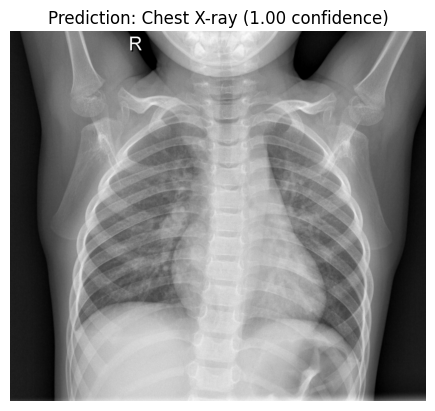

This image is classified as: Chest X-ray (confidence: 1.00)


In [ ]:
# Install TensorFlow if needed
# !pip install tensorflow

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Parameters
IMAGE_SIZE = (224, 224)

# Function to predict image class
def predict_image_class(model, image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Could not read image. Check the path.")
        return

    # Resize image to model input size
    img_resized = cv2.resize(img, IMAGE_SIZE)

    # Normalize pixel values
    img_normalized = img_resized / 255.0

    # Reshape for model (1, 224, 224, 1)
    img_input = img_normalized.reshape(1, 224, 224, 1)

    # Make prediction
    prediction = model.predict(img_input)

    # Interpret result
    if prediction < 0.5:
        predicted_class = 'Brain Tumor'
        confidence = 1 - prediction[0][0]
    else:
        predicted_class = 'Chest X-ray'
        confidence = prediction[0][0]

    # Show image with prediction text
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {predicted_class} ({confidence:.2f} confidence)')
    plt.axis('off')
    plt.show()

    # Also print prediction text
    print(f"This image is classified as: {predicted_class} (confidence: {confidence:.2f})")

# Example Usage:
# Replace with your own image path in Colab
predict_image_class(model, '/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


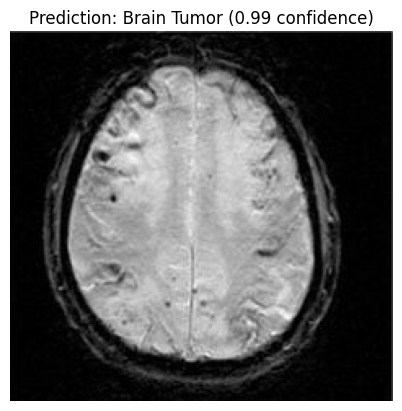

This image is classified as: Brain Tumor (confidence: 0.99)
